Mit Binder oder Colab kann das Jupyter-Notebook interaktiv im Browser gestartet werden:

[![Binder](https://mybinder.org/badge_logo.svg)](https://mybinder.org/v2/gh/opendatazurich/opendatazurich.github.io/master?filepath=rpk-api/RPK-API-Beispiele.ipynb)

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/opendatazurich/opendatazurich.github.io/blob/master/rpk-api/RPK-API-Beispiele.ipynb)


# Python-Beispiele für RPK-API

This notebook contains some examples to show how to work with the RPK API.
Dieses Notebook beinhaltet einige Python-Beispiele, die zeigen, wie man mit der RPK-API arbeiten kann.

Inhaltsverzeichnis:

1. [Modell](#Modell)
1. [Departemente und Institutionen abfragen](#Departemente-und-Institutionen-abfragen)
1. [Konten abfragen](#Konten-abfragen)


# Modell
Wichtig für das Verständnis ist das zugrunde liegende Modell, welches die Entitäten und deren Zusammenhänge erklärt:

![Modell der Entitäten des RPK-APIs](model.png)

In [1]:
%pip install requests pandas

Note: you may need to restart the kernel to use updated packages.


In [230]:
import requests
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt

In [3]:
SSL_VERIFY = True
# evtl. SSL_VERIFY auf False setzen wenn die Verbindung zu https://www.gemeinderat-zuerich.ch nicht klappt (z.B. wegen Proxy)
# Um die SSL Verifikation auszustellen, bitte die nächste Zeile einkommentieren ("#" entfernen)
# SSL_VERIFY = False

In [79]:
def clean_nested_dicts(nested, key='key'):
    """
    This turns a list of nested dicts into a list of flat dicts
    For the nested dicts, only the value of the given key will be kept.
    """
    clean_data = []
    if type(nested) is dict:
        nested = [nested]
    for r in nested:
        row = {}
        for k,v in r.items():
            if type(v) is dict:
                row[k] = v[key]
            else:
                row[k] = v
        clean_data.append(row)
    return clean_data

In [13]:
if not SSL_VERIFY:
    import urllib3
    urllib3.disable_warnings()

headers = {
    'Accept': 'application/json',
    'api-key': 'vopVcmhIMkeUCf8gQjk1GgU2wK+fKihAdlCl0WKJ'
}

# Departemente und Institutionen abfragen

Institutionen sind die einzelnen Teile der Verwaltung. Jede Institution ist einem Departement zugewiesen.

Neben den bekannten 9 Departementen mit jeweils einem Stadtrat als Vorsteherin, gibt es noch ein 10. Deparatement "Behörden und Gesamtverwaltung", bei dem z.B. die Stadtkanzlei oder der Datenschutzbeauftragte angesiedelt ist.

## Alle Departemente

In [182]:
r = requests.get('https://api.stadt-zuerich.ch/rpkk-rs/v1/departemente', headers=headers, verify=SSL_VERIFY)
data = r.json()
dep = pd.DataFrame(data['value']).set_index('key')
dep

,bezeichnung,kurzname
key,,
10,Behörden und Gesamtverwaltung,BUG
15,Präsidialdepartement,PRD
20,Finanzdepartement,FD
25,Sicherheitsdepartement,SID
30,Gesundheits- und Umweltdepartement,GUD
35,Tiefbau- und Entsorgungsdepartement,TED
40,Hochbaudepartement,HBD
45,Departement der Industriellen Betriebe,DIB
50,Schul- und Sportdepartement,SSD


## Alle Institutionen

### Alle Instistutionen auflisten

In [183]:
r = requests.get('https://api.stadt-zuerich.ch/rpkk-rs/v1/institutionen', headers=headers, verify=SSL_VERIFY)
data = r.json()

# flatten the nested dict, keep only "key" of departement
clean_data = clean_nested_dicts(data['value'])
inst = pd.DataFrame(clean_data).set_index('key')
inst

,bezeichnung,departement,kurzname
key,,,
1000,Gemeinde,10,GZ
1005,Gemeinderat,10,GRZ
1007,Finanzkontrolle,10,ZFK
1010,Beauftragte/r in Beschwerdesachen,10,OMB
1015,Stadtrat,10,STR
1020,Stadtkanzlei,10,SKZ
1025,Rechtskonsulent,10,REK
1030,Kindes- und Erwachsenenschutzbehörde (neu 5530),10,KEB
1035,Datenschutzbeauftragte/r,10,DAS


In [189]:
dep.index[dep.kurzname == 'SID'].tolist()[0]

'25'

## Instistutionen nach Departement filtern

In [190]:
# SID = Sicherheitsdepartement
sid_key = dep.index[dep.kurzname == 'SID'].tolist()[0]
params = {'orgKeyDepartement': sid_key}
r = requests.get(
    'https://api.stadt-zuerich.ch/rpkk-rs/v1/institutionen',
    params=params,
    headers=headers,
    verify=SSL_VERIFY
)
data = r.json()

clean_data = clean_nested_dicts(data['value'])
sid_inst = pd.DataFrame(clean_data)
sid_inst

,bezeichnung,departement,key,kurzname
0,Sicherheitsdepartement Departementssekretariat,25,2500,SID
1,Schutzraumbautenfonds,25,2501,SID-SR
2,Parkgebühren,25,2505,DAV-PG
3,Blaue Zonen,25,2506,DAV-BZ
4,Stadtpolizei,25,2520,STP
5,Stadtrichteramt,25,2525,SRA
6,Schutz & Rettung,25,2550,SRZ
7,Dienstabteilung Verkehr,25,2555,DAV


# Konten abfragen (HRM 1)

Wie im [Modell](#Modell) oben ersichtlich, hängen Konten an Institutionen.



## Konten einer Dienstabteilung anzeigen

In [191]:
# DAV = Dienstabteilung Verkehr, eine Dienstabteilung im Sicherheitsdepartement
dav_key = sid_inst[sid_inst.kurzname == 'DAV'].to_dict('records')[0]['key']
params = {'orgKey': dav_key}
r = requests.get(
    'https://api.stadt-zuerich.ch/rpkk-rs/v1/konten',
    params=params,
    headers=headers,
    verify=SSL_VERIFY
)
data = r.json()

clean_data = clean_nested_dicts(data['value'])
dav_accounts = pd.DataFrame(clean_data)
dav_accounts

,bezeichnung,id,institution,kontoNr
0,Löhne des Verwaltungs- und Betriebspersonals,2774,2555,3010 0000
1,Löhne des Verwaltungs- und Betriebspersonals,8826,2555,3010 00 000
2,Erstattung von Lohn des Verwaltungs- und Betri...,8827,2555,3010 00 900
3,Löhne des Personals in Ausbildung,2775,2555,3012 0000
4,Sozialversicherungsbeiträge,2776,2555,3030 0000
5,Personalversicherungsbeiträge,2777,2555,3040 0000
6,Kinder- und Ausbildungszulagen,8828,2555,3040 00 000
7,Verpflegungszulagen,8829,2555,3042 00 000
8,Übrige Zulagen,8830,2555,3049 00 000
9,Unfall- und Krankenversicherungsbeiträge,2778,2555,3050 0000


## Hierarchie der Konten
Konten sind hierarchisch abgebildet, d.h. die kürzeren Kontonummern sind Aggregationen der längeren (detaillierteren) Kontonummern.
Beispiel: Das Konto 3010 0000 _beinhaltet_ die Konten 3010 00 000 und 3010 00 900.

In [192]:
dav_accounts[dav_accounts.kontoNr.str.startswith('3010 00')]

,bezeichnung,id,institution,kontoNr
0,Löhne des Verwaltungs- und Betriebspersonals,2774,2555,3010 0000
1,Löhne des Verwaltungs- und Betriebspersonals,8826,2555,3010 00 000
2,Erstattung von Lohn des Verwaltungs- und Betri...,8827,2555,3010 00 900


## Einzelnes Konto anschauen (HRM1)

An einem Konto hängt eine Betragsreihe mit Beträgen und Betragstypen (siehe [Modell](#Modell)).

Der städtische Budget- und Rechnungsprozess durchläuft eine Reihe von Phasen: Vom Voranschlag, über Nachträge im sogenannten Novemberbrief über das vom Gemeinderat beschlossene Budget sowie mehrere Runden mit Nachtragskrediten. Diese Phasen sind im API als Betragstypen abgebildet.

In [193]:
account_id = dav_accounts[dav_accounts.bezeichnung == 'Fachliteratur und Zeitschriften'].to_dict('records')[0]['id']
params = {
    'kontoId': account_id
}
r = requests.get(
    'https://api.stadt-zuerich.ch/rpkk-rs/v1/betragsreihe',
    params=params,
    headers=headers,
    verify=SSL_VERIFY
)
data = r.json()

# flatten the data
flat_data = []
for r in data['value']:
    for ir in r['betraege']:
        row = {'jahr': r['jahr']}
        for ik,iv in ir.items():
            row[ik] = iv
        flat_data.append(row)

amount = pd.DataFrame(flat_data)
amount['betragInFr'] = amount.apply(lambda row: row.betragInRappen / 100, axis = 1)
amount

,betragInRappen,betragsTyp,jahr,wert,betragInFr
0,2000000,STADTRAT_ANTRAG,2012,20000.00,20000.00
1,2000000,GEMEINDERAT_BESCHLUSS,2012,20000.00,20000.00
2,1729621,RECHNUNG,2012,17296.21,17296.21
3,2000000,STADTRAT_ANTRAG,2013,20000.00,20000.00
4,2000000,GEMEINDERAT_BESCHLUSS,2013,20000.00,20000.00
5,1559325,RECHNUNG,2013,15593.25,15593.25
6,2100000,STADTRAT_ANTRAG,2014,21000.00,21000.00
7,2100000,GEMEINDERAT_BESCHLUSS,2014,21000.00,21000.00
8,1929221,RECHNUNG,2014,19292.21,19292.21
9,1359755,RECHNUNG,2015,13597.55,13597.55


# Neue Rechnungslegung (HRM2)

In den Jahren 2012 – 2018 wurden Institutionen mit Globalbudget nicht über die API veröffentlicht.
Jedoch wurden die Beträge in diesen Jahren bis auf die 4-stellige Kontonummer ausgewiesen (siehe Abfrage betragsreihe).

Ab 2019 werden auch Institutionen mit Globalbudget im API angeboten.
Um eine Vergleichbarkeit aller städtischen Institutionen zu ermöglichen werden die Kontonummern nur noch 1- und 2-stellig angeboten (siehe Abfrage sachkonto2stellig). 
Vergleiche über Zeit und Institutionen sind somit erst ab den Daten von 2019 möglich.

In [216]:
key = dep.index[dep.kurzname == 'PRD'].tolist()[0]
params = {
    'departement': key,
    'jahr': 2019,
    'betragsTyp': 'GEMEINDERAT_BESCHLUSS'
}
r = requests.get(
    'https://api.stadt-zuerich.ch/rpkk-rs/v1/sachkonto2stellig',
    params=params,
    headers=headers,
    verify=SSL_VERIFY
)
data = r.json()

amountTwo = pd.DataFrame(data['value'])
amountTwo = amountTwo.astype({'betrag': 'int64'})
amountTwo

,betrag,betragsTyp,institution,jahr,sachkonto
0,3356900,GEMEINDERAT_BESCHLUSS,1500,2019,30
1,4610400,GEMEINDERAT_BESCHLUSS,1505,2019,30
2,1224400,GEMEINDERAT_BESCHLUSS,1506,2019,30
3,6871100,GEMEINDERAT_BESCHLUSS,1510,2019,30
4,6454300,GEMEINDERAT_BESCHLUSS,1520,2019,30
5,21134000,GEMEINDERAT_BESCHLUSS,1530,2019,30
6,800200,GEMEINDERAT_BESCHLUSS,1561,2019,30
7,2388500,GEMEINDERAT_BESCHLUSS,1565,2019,30
8,4145700,GEMEINDERAT_BESCHLUSS,1575,2019,30
9,305000,GEMEINDERAT_BESCHLUSS,1500,2019,31


Die 1- und 2stelligen Sachkontonummern befinden sich im sachkonto_codes.csv:

In [217]:
sachkonto = pd.read_csv('sachkonto_codes.csv')
sachkonto.sort_values('Sachkonto', inplace=True)
sachkonto.drop_duplicates(inplace=True) 
sachkonto.set_index('Sachkonto', inplace=True)
sachkonto

,Bezeichnung
Sachkonto,
3,Aufwand
30,Personalaufwand
31,Sach- und übriger Betriebsaufwand
33,Abschreibungen VV
34,Finanzaufwand
35,Einlagen in Fonds und Spezialfinanzierungen
36,Transferaufwand
37,Durchlaufende Beiträge
39,Interne Verrechnungen


In [218]:
sachkonto[sachkonto.index == '30']

,Bezeichnung
Sachkonto,
30,Personalaufwand


In [219]:
# merge amount, instistution and sachkonto
merged = amountTwo.join(sachkonto, on='sachkonto').rename(columns={'Bezeichnung': 'sachkonto_bezeichnung'})
merged = merged.join(inst, on='institution').rename(columns={'bezeichnung': 'inst_bezeichnung'})
merged = merged[['jahr', 'betrag', 'betragsTyp', 'institution', 'kurzname', 'inst_bezeichnung', 'departement', 'sachkonto', 'sachkonto_bezeichnung']]
merged

,jahr,betrag,betragsTyp,institution,kurzname,inst_bezeichnung,departement,sachkonto,sachkonto_bezeichnung
0,2019,3356900,GEMEINDERAT_BESCHLUSS,1500,PRD,Präsidialdepartement Departementssekretariat,15,30,Personalaufwand
1,2019,4610400,GEMEINDERAT_BESCHLUSS,1505,STE,Stadtentwicklung,15,30,Personalaufwand
2,2019,1224400,GEMEINDERAT_BESCHLUSS,1506,ZFG,Fachstelle für Gleichstellung,15,30,Personalaufwand
3,2019,6871100,GEMEINDERAT_BESCHLUSS,1510,KTR,Kultur,15,30,Personalaufwand
4,2019,6454300,GEMEINDERAT_BESCHLUSS,1520,MRZ,Museum Rietberg,15,30,Personalaufwand
5,2019,21134000,GEMEINDERAT_BESCHLUSS,1530,BVA,Bevölkerungsamt,15,30,Personalaufwand
6,2019,800200,GEMEINDERAT_BESCHLUSS,1561,PSS,Stabstelle Projektstab Stadtrat im Präsidialde...,15,30,Personalaufwand
7,2019,2388500,GEMEINDERAT_BESCHLUSS,1565,SAR,Stadtarchiv,15,30,Personalaufwand
8,2019,4145700,GEMEINDERAT_BESCHLUSS,1575,SSZ,Statistik Stadt Zürich,15,30,Personalaufwand
9,2019,305000,GEMEINDERAT_BESCHLUSS,1500,PRD,Präsidialdepartement Departementssekretariat,15,31,Sach- und übriger Betriebsaufwand


## Plot der Daten

In [220]:
# to use different styles, make sure to reload the default to always get clean results
def use_style(style):
    plt.style.use('default')
    plt.style.use(style)

In [221]:
amount_pers = merged[(merged.sachkonto_bezeichnung == 'Personalaufwand') & (merged.jahr == 2019) ].reset_index()
amount_pers

,index,jahr,betrag,betragsTyp,institution,kurzname,inst_bezeichnung,departement,sachkonto,sachkonto_bezeichnung
0,0,2019,3356900,GEMEINDERAT_BESCHLUSS,1500,PRD,Präsidialdepartement Departementssekretariat,15,30,Personalaufwand
1,1,2019,4610400,GEMEINDERAT_BESCHLUSS,1505,STE,Stadtentwicklung,15,30,Personalaufwand
2,2,2019,1224400,GEMEINDERAT_BESCHLUSS,1506,ZFG,Fachstelle für Gleichstellung,15,30,Personalaufwand
3,3,2019,6871100,GEMEINDERAT_BESCHLUSS,1510,KTR,Kultur,15,30,Personalaufwand
4,4,2019,6454300,GEMEINDERAT_BESCHLUSS,1520,MRZ,Museum Rietberg,15,30,Personalaufwand
5,5,2019,21134000,GEMEINDERAT_BESCHLUSS,1530,BVA,Bevölkerungsamt,15,30,Personalaufwand
6,6,2019,800200,GEMEINDERAT_BESCHLUSS,1561,PSS,Stabstelle Projektstab Stadtrat im Präsidialde...,15,30,Personalaufwand
7,7,2019,2388500,GEMEINDERAT_BESCHLUSS,1565,SAR,Stadtarchiv,15,30,Personalaufwand
8,8,2019,4145700,GEMEINDERAT_BESCHLUSS,1575,SSZ,Statistik Stadt Zürich,15,30,Personalaufwand


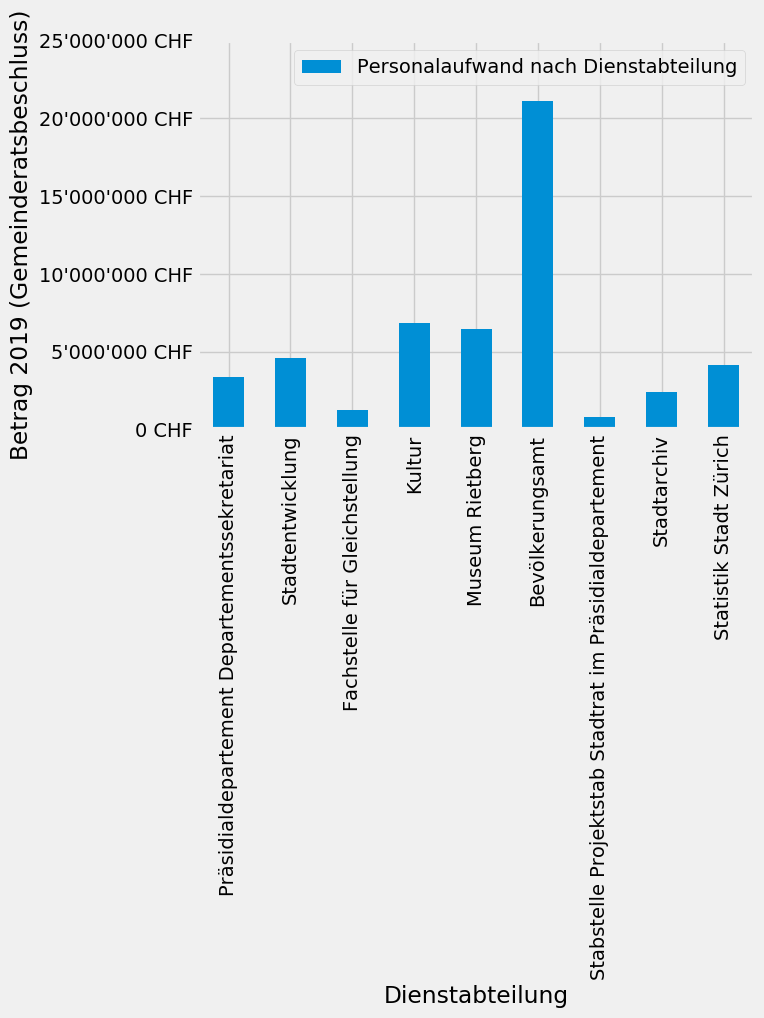

In [261]:
use_style('fivethirtyeight')

fig, ax = plt.subplots()
amount_pers.plot(kind='bar', y='betrag', x="inst_bezeichnung", label="Personalaufwand nach Dienstabteilung", ax=ax, linewidth=0.8)
ax.set_ylim([0, 25000000])
ax.get_yaxis().set_major_formatter(
    matplotlib.ticker.FuncFormatter(lambda x, p: f"{x:_.0f} CHF".replace('_', "\'"))
)
plt.xticks(rotation=90)
ax.set_ylabel('Betrag 2019 (Gemeinderatsbeschluss)')
ax.set_xlabel('Dienstabteilung')
plt.show()